In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.gam.smooth_basis import BSplines, compute_all_knots, UnivariateBSplines
# from scipy.interpolate import BSpline
from aging.plotting import figure, format_plots
from toolz import partial

In [2]:
format_plots()

In [11]:
def b_spline_basis(x, i, degree, knots):
    """
    Compute the value of the i-th B-spline basis function of given degree at x,
    using np.where to avoid division by zero.
    """
    if degree == 0:
        return np.where((knots[i] <= x) & (x <= knots[i + 1]), 1.0, 0.0)
    else:
        # Avoid division by zero
        left_denom = np.where(knots[i + degree] != knots[i], knots[i + degree] - knots[i], 1)
        right_denom = np.where(knots[i + degree + 1] != knots[i + 1], knots[i + degree + 1] - knots[i + 1], 1)

        left_term = (x - knots[i]) / left_denom
        right_term = (knots[i + degree + 1] - x) / right_denom

        left = left_term * b_spline_basis(x, i, degree - 1, knots)
        right = right_term * b_spline_basis(x, i + 1, degree - 1, knots)

        return left + right

# Example usage
degree = 3  # Cubic B-splines
knots = np.linspace(0, 1, 4)  # Example knot sequence
knots = np.hstack([np.ones(degree)*knots[0], knots, np.ones(degree)*knots[-1]])
x_values = np.linspace(0,1,50)  # Example array of x values

basis_fun = partial(b_spline_basis, degree=degree, knots=knots)

# Compute the value of each basis function at each x value
basis_values = np.array([basis_fun(x_values, i) for i in range(len(knots) - degree - 1)])

In [13]:
basis_values.shape

(6, 50)

In [8]:
x = BSplines(np.linspace(0, 1, 50), 4, 3, include_intercept=True, knot_kwds=[{'knots': np.linspace(0, 1, 4)}])

ValueError: df=4 with degree=3 implies 0 knots, but 4 knots were provided

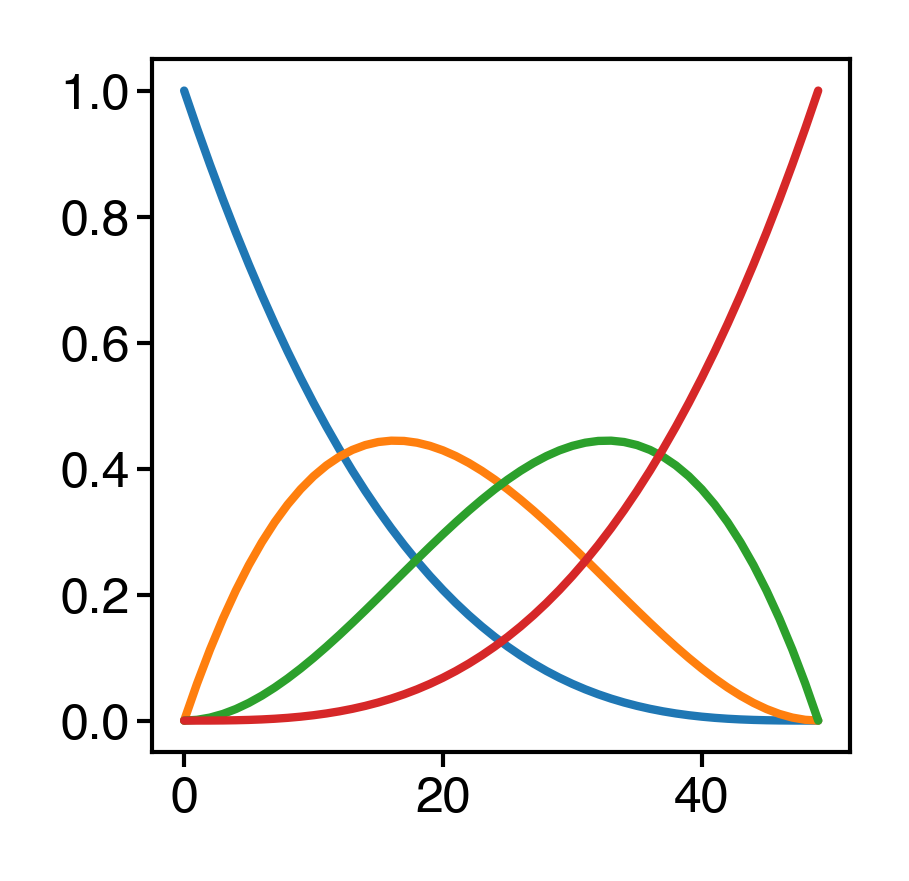

In [15]:
figure(1.5, 1.5)
plt.plot(x.basis)

In [32]:
compute_all_knots(np.linspace(0, 1, 25), 5, 3)

(array([0. , 1. , 0. , 1. , 0. , 1. , 0. , 1. , 0.5]), 0.0, 1.0, array([0.5]))

In [64]:
np.linspace(0, 0.75, 2)

array([0.  , 0.75])

In [88]:
endpoint = 0.95
x = UnivariateBSplines(np.linspace(0, 1, 100), 6, include_intercept=True, knots=[0.5, endpoint])

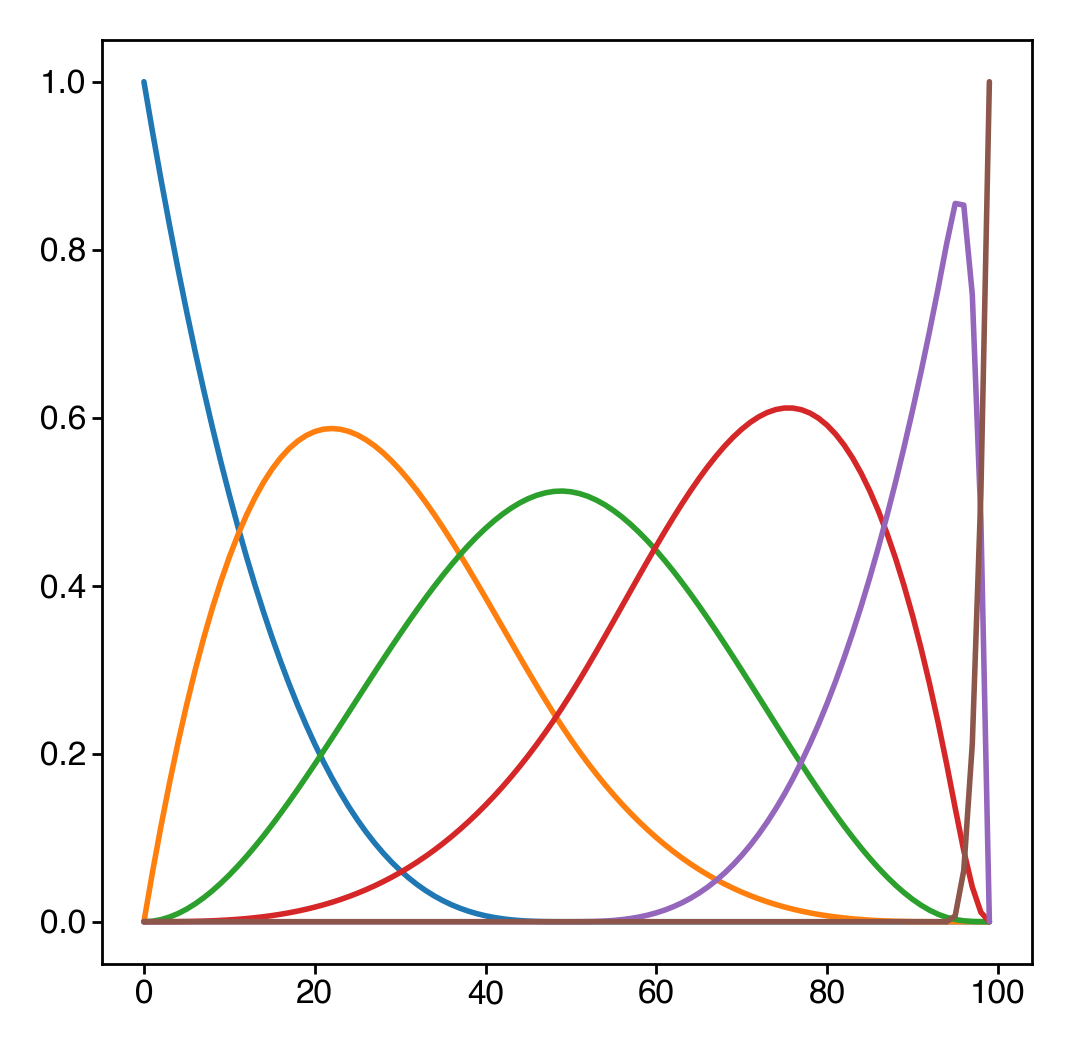

In [89]:
plt.plot(x.basis)

In [90]:
endpoint = 0.95
x = UnivariateBSplines(np.linspace(0, 1, 100), 5, include_intercept=True, knots=[endpoint])

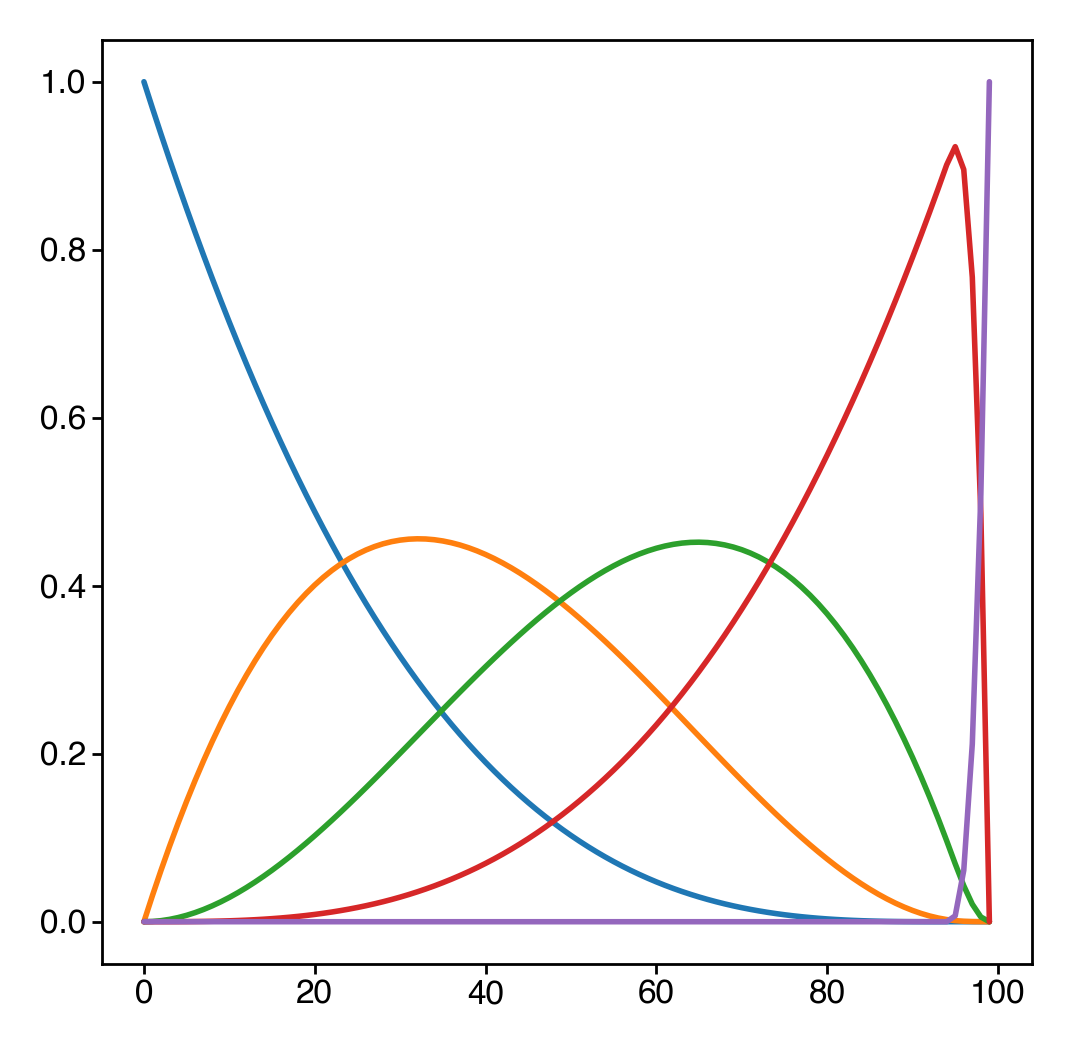

In [91]:
plt.plot(x.basis)

In [92]:
x.transform(0.3)

array([[0.32030908, 0.45381834, 0.19745152, 0.02842105, 0.        ]])

In [95]:
age_sd = 10
new_sd = np.sqrt(np.log(1 + (age_sd ** 2) / (50 ** 2)))
new_sd

0.1980422004353651